# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [2]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']

print('Male Height Mean:',male_df.Height.mean())
print('Male Height sd:',male_df.Height.std())
print('Male Weight Mean:',male_df.Weight.mean())
print('Male Weight sd:',male_df.Weight.std())

print('Female Height Mean:',female_df.Height.mean())
print('Female Height sd:',female_df.Height.std())
print('Female Weight Mean:',female_df.Weight.mean())
print('Female Weight sd:',female_df.Weight.std())

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height Mean: 69.02634590621741
Male Height sd: 2.863362228660647
Male Weight Mean: 187.0206206581932
Male Weight sd: 19.7811545167638
Female Height Mean: 63.70877360342507
Female Height sd: 2.696284015765054
Female Weight Mean: 135.86009300746835
Female Weight sd: 19.022467805319028


In [4]:
female_df

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

<function matplotlib.pyplot.show(*args, **kw)>

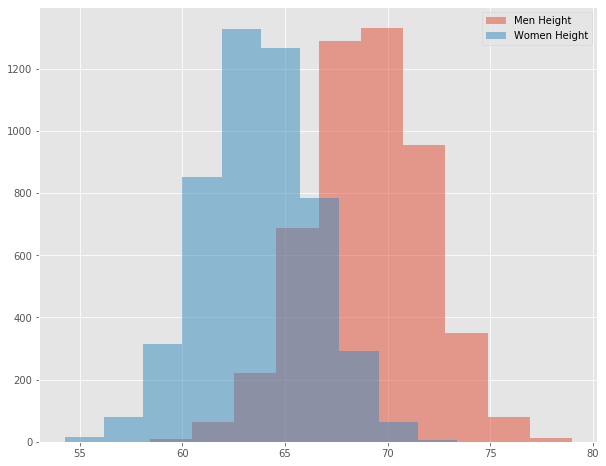

In [5]:
plt.figure(figsize=(10,8))
plt.hist(male_df.Height,alpha=0.5, label='Men Height')
plt.hist(female_df.Height,alpha=0.5, label = 'Women Height')
plt.legend()
plt.show

In [6]:
# Record your observations - are these inline with your personal observations?
#Men are taller than women with some overlap. checks out

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

In [7]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    # Initialize numpy arrays with zeros to store interpolated values
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    # plot the calculated curve
    return pdfx, pdfy


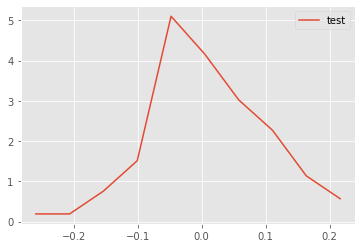

In [8]:
#Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

<function matplotlib.pyplot.show(*args, **kw)>

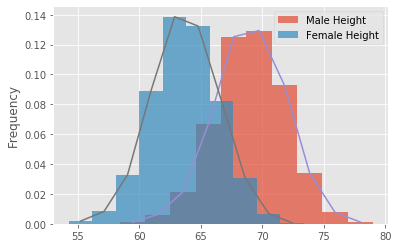

In [9]:
# Your code here 
#density_mh=density(male_df.Height)
#density_fh=density(female_df.Height)
#plt.plot(density_mh)
#plt.plot(density_fh)
# doesnt work for whatever reason
binsize=10
#plt.hist(male_df.Height,alpha=0.5, bins=binsize, label='Men Height')
#plt.hist(female_df.Height,alpha=0.5,bins=binsize, label = 'Women Height')
#plt.legend()
#doesnt work - maybe because im like classifying this plt as a histogram
#by telling it to graph this way?
male_df.Height.plot.hist(bins = binsize, density = True,  alpha = 0.7, label ="Male Height");
female_df.Height.plot.hist(bins = binsize, density = True, alpha = 0.7, label = 'Female Height');
plt.legend()
x,y=density(male_df.Height)
plt.plot(x,y)
x,y=density(female_df.Height)
plt.plot(x,y)
plt.show

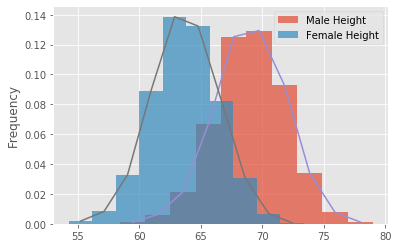

In [10]:
binsize=10
male_df.Height.plot.hist(bins = binsize, density = True,  alpha = 0.7, label ="Male Height");
female_df.Height.plot.hist(bins = binsize, density = True, alpha = 0.7, label = 'Female Height');
plt.legend()
x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)
plt.show()

## Repeat the above exercise for male and female weights

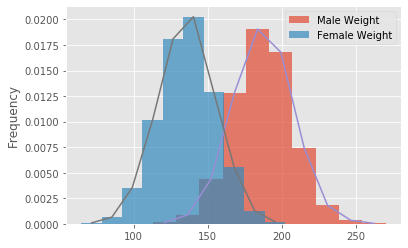

In [12]:
binsize=10
male_df.Weight.plot.hist(bins = binsize, density = True,  alpha = 0.7, label ="Male Weight");
female_df.Weight.plot.hist(bins = binsize, density = True, alpha = 0.7, label = 'Female Weight');
plt.legend()
x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)
plt.show()

## Write your observations in the cell below

In [25]:
#normal distribution 

## Repeat the above experiments in seaborn and compare with your results

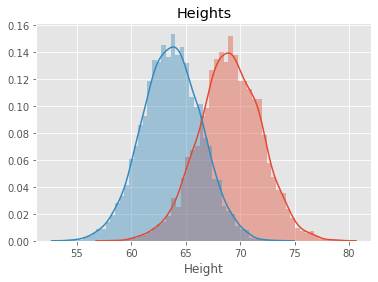

In [15]:
# Code for heights here
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Heights')
plt.show()

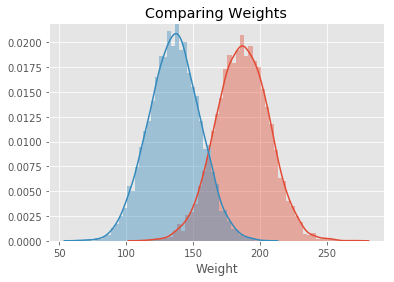

In [24]:
# Code for weights here

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.